In [1]:
from __future__ import division
from __future__ import absolute_import
from __future__ import print_function

import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import xgboost as xgb
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib notebook
print(np.__version__)

1.12.1


In [2]:
X_open = np.load('./Np_files/open.npy')
X_50_open = np.load('./Np_files/open_50.npy')
X_25_open = np.load('./Np_files/open_25.npy')
X_13_open = np.load('./Np_files/open_13.npy')
X_7_open = np.load('./Np_files/open_7.npy')
open_target = np.ones(X_50_open.shape[0])

X_close = np.load('./Np_files/close.npy')
X_50_close = np.load('./Np_files/close_50.npy')
X_25_close = np.load('./Np_files/close_25.npy')
X_13_close = np.load('./Np_files/close_13.npy')
X_7_close = np.load('./Np_files/close_7.npy')
close_target = np.zeros(X_50_close.shape[0])

targets = np.concatenate((open_target, close_target))

X = np.concatenate((X_open, X_close))
X_50 = np.concatenate((X_50_open, X_50_close))
X_25 = np.concatenate((X_25_open, X_25_close))
X_13 = np.concatenate((X_13_open, X_13_close))
X_7 = np.concatenate((X_7_open, X_7_close))

# Original resolution

<IPython.core.display.Javascript object>


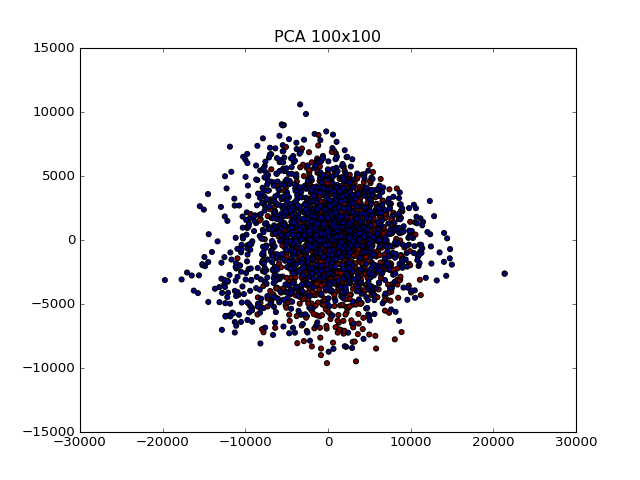

In [24]:
pca = PCA(n_components=2)
X_transform = pca.fit_transform(X)
fig = plt.figure()
plt.scatter(X_transform[:,0], X_transform[:,1],c=targets)
plt.title("PCA 100x100")
fig.savefig("PCA-2d-100")

<IPython.core.display.Javascript object>


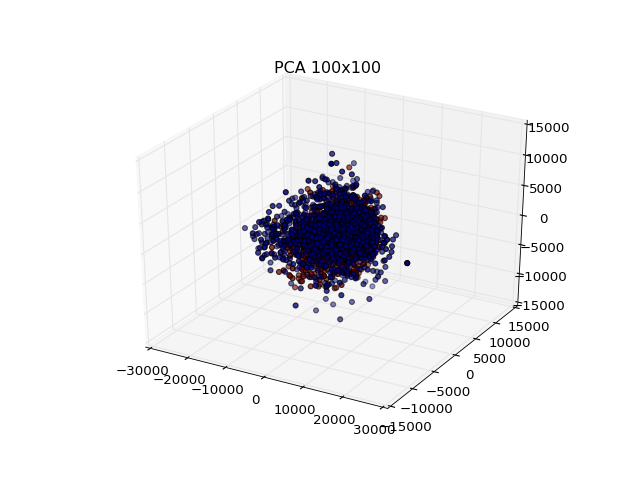

In [4]:
fig = plt.figure()
#print(np.isfinite(X_13).all())
ax = fig.add_subplot(111, projection='3d')
pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)
ax.set_title("PCA 100x100")
ax.scatter(X_transform[:,0], X_transform[:,1], X_transform[:,2],c=targets)
fig.savefig("PCA-3d-100")

<IPython.core.display.Javascript object>


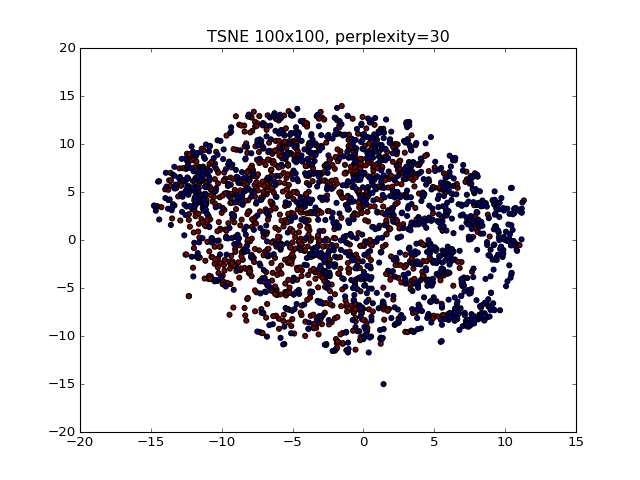

KL Divergence:  1.3817576169967651


In [26]:
tsne = TSNE(n_components=2,perplexity=30)
X_transform = tsne.fit_transform(X)
fig = plt.figure()
print("KL Divergence: ", tsne.kl_divergence_)
plt.scatter(X_transform[:,0], X_transform[:,1],c=targets)
plt.title("TSNE 100x100, perplexity=30")
fig.savefig("TSNE-2d-100")

<IPython.core.display.Javascript object>


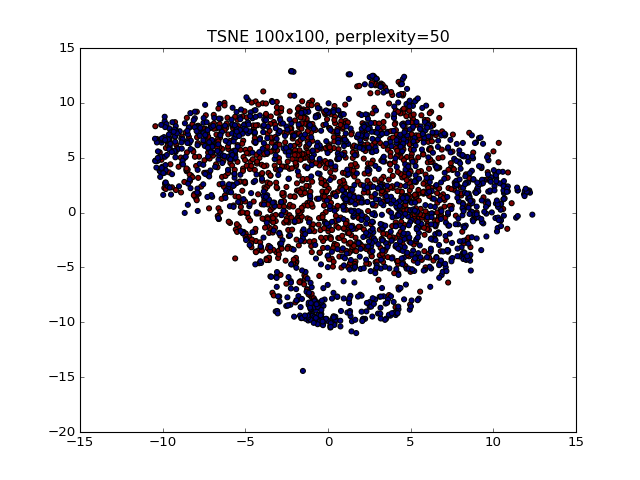

KL Divergence:  1.193042278289795


In [27]:
tsne = TSNE(n_components=2,perplexity=50)
X_transform = tsne.fit_transform(X)
fig = plt.figure()
print("KL Divergence: ", tsne.kl_divergence_)
plt.scatter(X_transform[:,0], X_transform[:,1],c=targets)
plt.title("TSNE 100x100, perplexity=50")
fig.savefig("TSNE-2d-100")

<IPython.core.display.Javascript object>


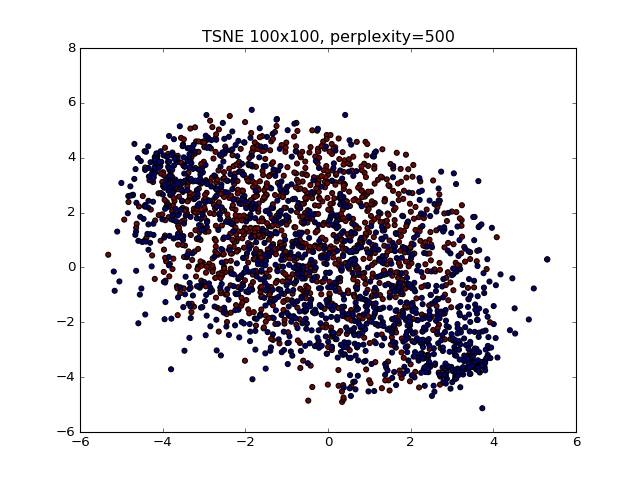

KL Divergence:  0.347389817237854


In [29]:
tsne = TSNE(n_components=2,perplexity=500)
X_transform = tsne.fit_transform(X)
fig = plt.figure()
print("KL Divergence: ", tsne.kl_divergence_)
plt.scatter(X_transform[:,0], X_transform[:,1],c=targets)
plt.title("TSNE 100x100, perplexity=500")
fig.savefig("TSNE-2d-100-p500")

<IPython.core.display.Javascript object>


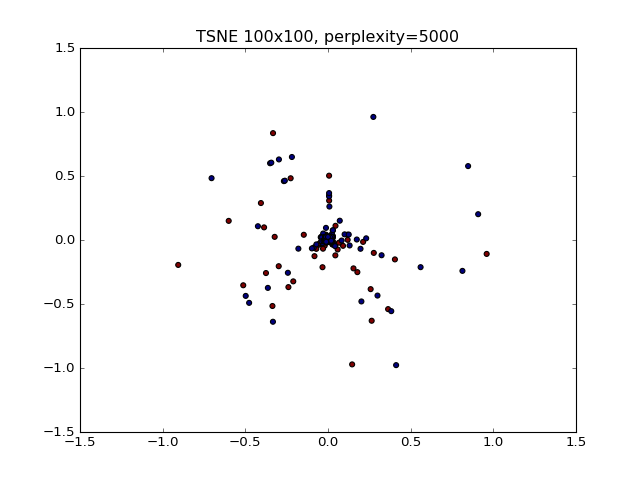

KL Divergence:  0.050700221210718155


In [33]:
tsne = TSNE(n_components=2,perplexity=5000)
X_transform = tsne.fit_transform(X)
fig = plt.figure()
print("KL Divergence: ", tsne.kl_divergence_)
plt.scatter(X_transform[:,0], X_transform[:,1],c=targets)
plt.title("TSNE 100x100, perplexity=5000")
fig.savefig("TSNE-2d-100-p5000")

<IPython.core.display.Javascript object>


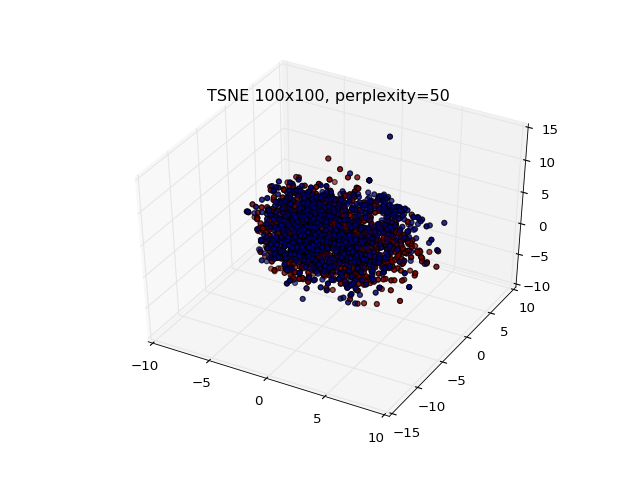

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
tsne = TSNE(n_components=3,perplexity=50)
X_transform = tsne.fit_transform(X)
ax.set_title("TSNE 100x100, perplexity=50")
ax.scatter(X_transform[:,0], X_transform[:,1], X_transform[:,2],c=targets)
fig.savefig("TSNE-3d-100_p50")

In [32]:
ax.set_title("TSNE 100x100, perplexity=50")
ax.scatter(X_transform[:,0], X_transform[:,1], X_transform[:,2],c=targets)
fig.savefig("TSNE-3d-100_p50")

# 50x50

<IPython.core.display.Javascript object>


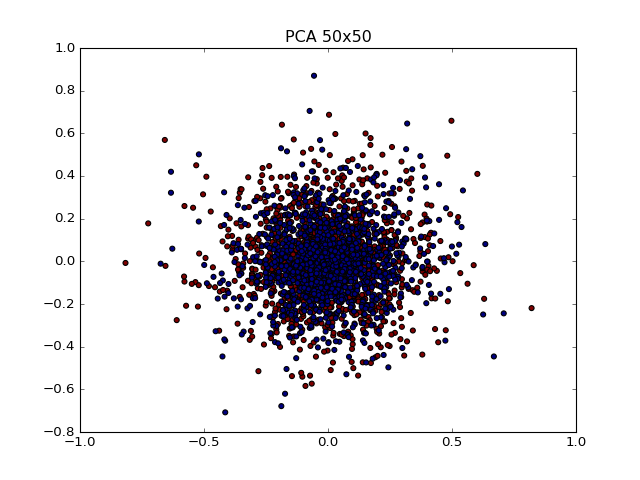

In [5]:
pca = PCA(n_components=2)
X_transform = pca.fit_transform(X_50)
fig = plt.figure()
plt.scatter(X_transform[:,0], X_transform[:,1],c=targets)
plt.title("PCA 50x50")
fig.savefig("PCA-2d-50")

<IPython.core.display.Javascript object>


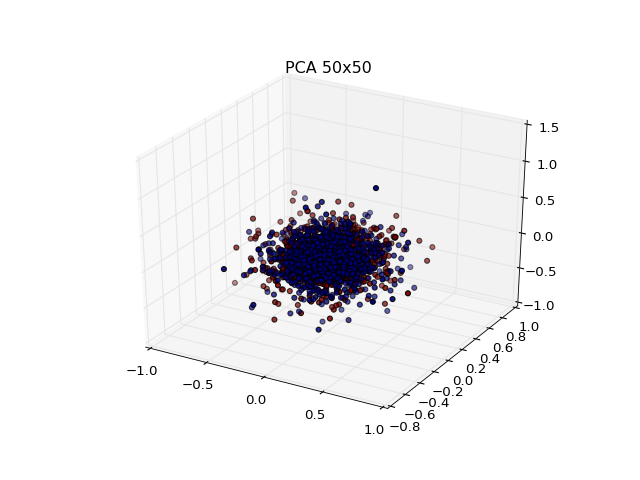

In [6]:
fig = plt.figure()
#print(np.isfinite(X_13).all())
ax = fig.add_subplot(111, projection='3d')
pca = PCA(n_components=3)
X_transform = pca.fit_transform(X_50)
ax.set_title("PCA 50x50")
ax.scatter(X_transform[:,0], X_transform[:,1], X_transform[:,2],c=targets)
fig.savefig("PCA-3d-50")

In [ ]:
tsne = TSNE(n_components=2,perplexity=30)
X_transform = tsne.fit_transform(X_50)
fig = plt.figure()
plt.scatter(X_transform[:,0], X_transform[:,1],c=targets)
plt.title("TSNE 50x50")
fig.savefig("TSNE-2d-50")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
tsne = TSNE(n_components=3,perplexity=30)
X_transform = tsne.fit_transform(X_50)
ax.set_title("TSNE 50x50")
ax.scatter(X_transform[:,0], X_transform[:,1], X_transform[:,2],c=targets)
fig.savefig("TSNE-3d-50")

# 25x25

<IPython.core.display.Javascript object>


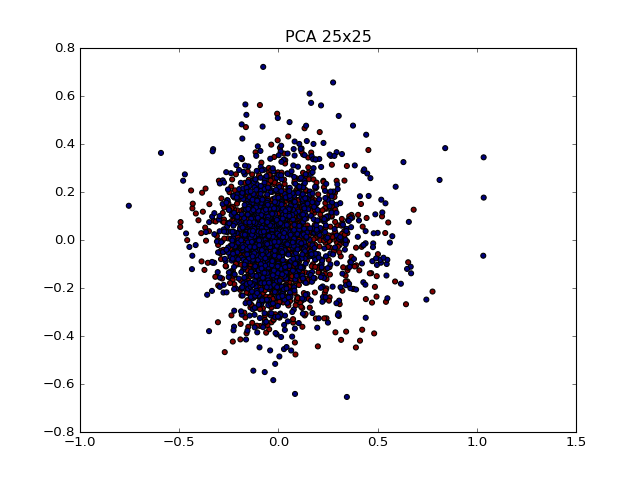

In [7]:
pca = PCA(n_components=2)
X_transform = pca.fit_transform(X_25)
fig = plt.figure()
plt.scatter(X_transform[:,0], X_transform[:,1],c=targets)
plt.title("PCA 25x25")
fig.savefig("PCA-2d-25")

<IPython.core.display.Javascript object>


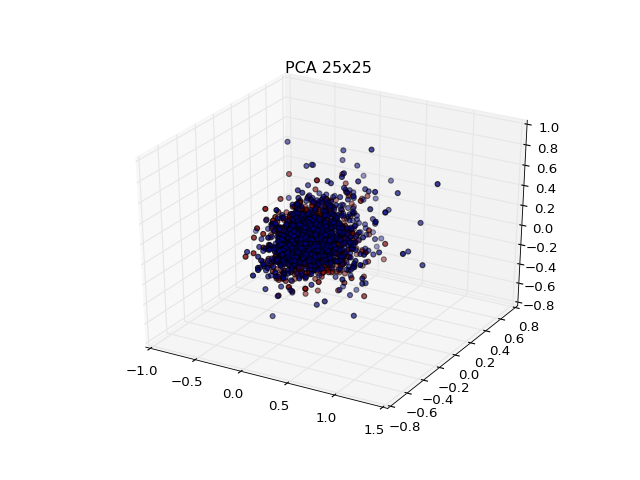

In [8]:
fig = plt.figure()
#print(np.isfinite(X_13).all())
ax = fig.add_subplot(111, projection='3d')
pca = PCA(n_components=3)
X_transform = pca.fit_transform(X_25)
ax.set_title("PCA 25x25")
ax.scatter(X_transform[:,0], X_transform[:,1], X_transform[:,2],c=targets)
fig.savefig("PCA-3d-25")

<IPython.core.display.Javascript object>


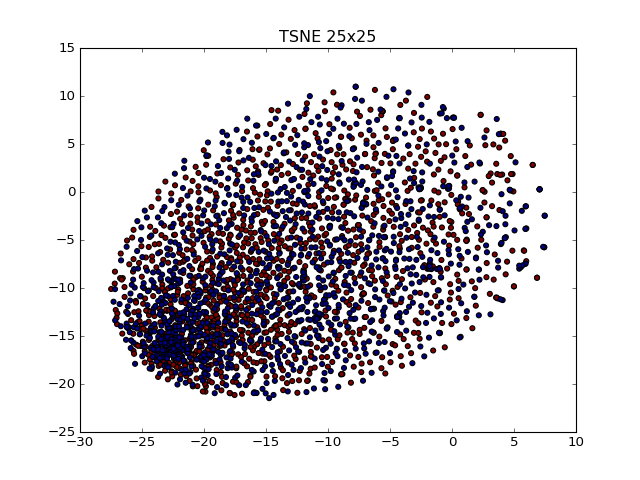

In [20]:
tsne = TSNE(n_components=2,perplexity=30)
X_transform = tsne.fit_transform(X_25)
fig = plt.figure()
plt.scatter(X_transform[:,0], X_transform[:,1],c=targets)
plt.title("TSNE 25x25")
fig.savefig("TSNE-2d-25")

<IPython.core.display.Javascript object>


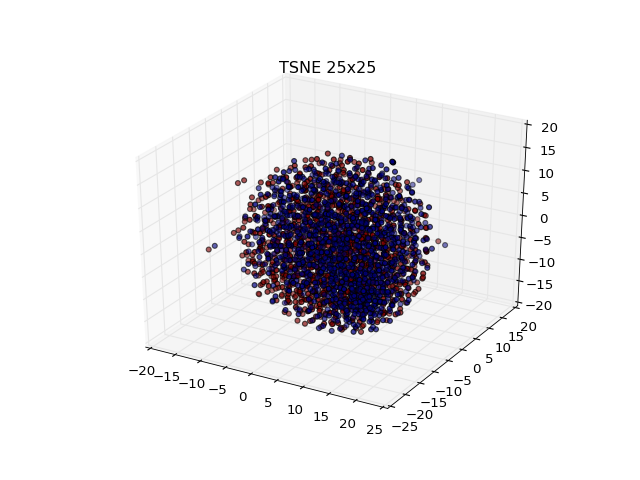

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
tsne = TSNE(n_components=3,perplexity=30)
X_transform = tsne.fit_transform(X_25)
ax.set_title("TSNE 25x25")
ax.scatter(X_transform[:,0], X_transform[:,1], X_transform[:,2],c=targets)
fig.savefig("TSNE-3d-25")

# 13x13

<IPython.core.display.Javascript object>


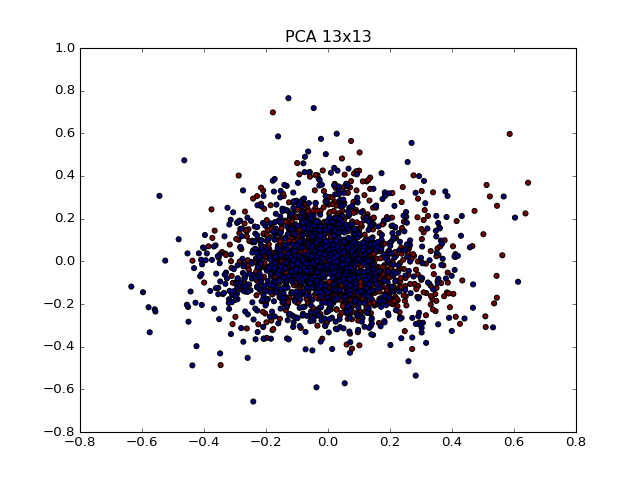

In [16]:
pca = PCA(n_components=2)
X_transform = pca.fit_transform(X_13)
fig = plt.figure()
plt.scatter(X_transform[:,0], X_transform[:,1],c=targets)
plt.title("PCA 13x13")
fig.savefig("PCA-2d-13")

<IPython.core.display.Javascript object>


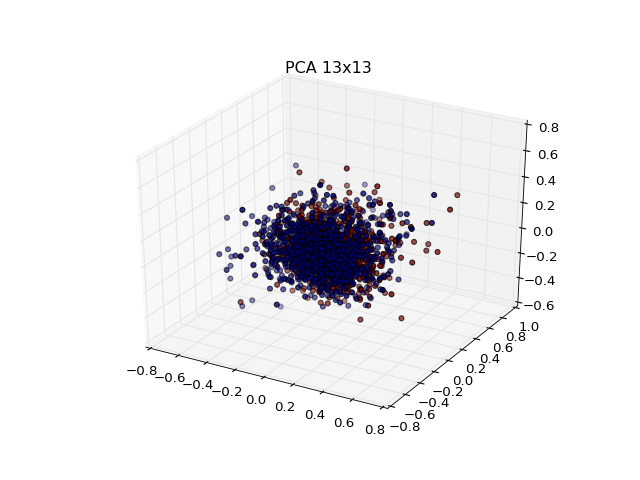

In [17]:
fig = plt.figure()
#print(np.isfinite(X_13).all())
ax = fig.add_subplot(111, projection='3d')
pca = PCA(n_components=3)
X_transform = pca.fit_transform(X_13)
ax.set_title("PCA 13x13")
ax.scatter(X_transform[:,0], X_transform[:,1], X_transform[:,2],c=targets)
fig.savefig("PCA-3d-13")

<IPython.core.display.Javascript object>


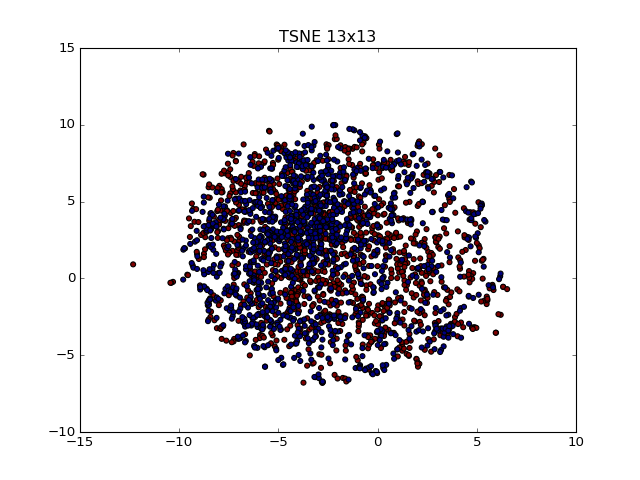

In [18]:
tsne = TSNE(n_components=2,perplexity=30, init='pca')
X_transform = tsne.fit_transform(X_13)
fig = plt.figure()
plt.scatter(X_transform[:,0], X_transform[:,1],c=targets)
plt.title("TSNE 13x13")
fig.savefig("TSNE-2d-13")

<IPython.core.display.Javascript object>


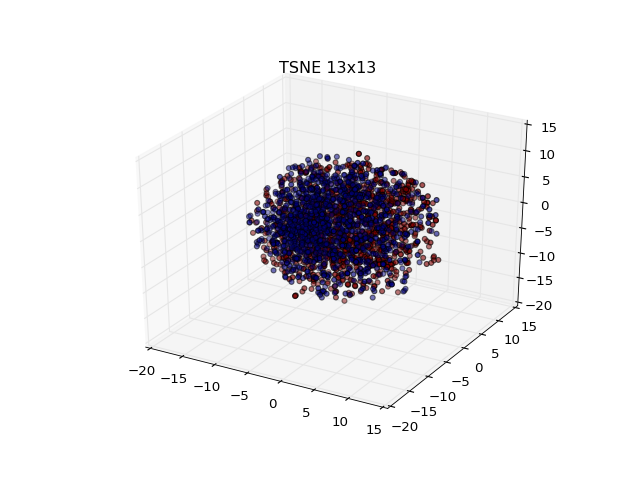

In [19]:
fig = plt.figure()
#print(np.isfinite(X_13).all())
ax = fig.add_subplot(111, projection='3d')
tsne = TSNE(n_components=3,perplexity=30)
X_transform = tsne.fit_transform(X_13)
ax.set_title("TSNE 13x13")
ax.scatter(X_transform[:,0], X_transform[:,1], X_transform[:,2],c=targets)
fig.savefig("TSNE-3d-13")